<a href="https://colab.research.google.com/github/mahidhiman12/Deep_learning_with_PyTorch/blob/main/5_PyTorch_cv_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.8.0+cu126
0.23.0+cu126


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

- healthcare : It also plays a role in analyzing microscopic images to accelerate drug discovery and development processes.

- manufacturing : Computer vision systems can detect minute defects like scratches, dents, or incorrect colors that human eyes might miss, ensuring products meet quality standards

- retail : Computer vision enables technologies like cashier-less stores and virtual fitting rooms, while also monitoring customer movement to optimize store layouts and enhance security

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

- Overfitting in machine learning occurs when a model becomes too complex and learns the training data, including its noise and irrelevant details, to the point where it performs poorly on new, unseen data.

- Essentially, the model "memorizes" the training data instead of generalizing the underlying patterns, leading to high accuracy on the training set but low accuracy on a test set.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. Note: there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

- Early Stopping:
Stop the training process once the model's performance on a validation set starts to decline

- Regularization:
Use techniques that penalize complex models to help select more useful features and reduce the model's sensitivity to the training data

- Reduce Model Complexity:
Simplify the model by removing unnecessary features or using a less complex architecture

## 4. Load the torchvision.datasets.MNIST() train and test datasets.

In [ ]:
from torchvision import datasets

train_data = datasets.MNIST(root="data",
                            train = True,
                            download = True,
                            transform =torchvision.transforms.ToTensor(),
                            target_transform = None)

test_data = datasets.MNIST(root="data",
                           train=False,
                           download = True,
                           transform = ToTensor(),
                           target_transform = None)


100%|██████████| 9.91M/9.91M [00:00<00:00, 59.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 14.5MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.62MB/s]


In [ ]:
len(train_data) , len(test_data)

(60000, 10000)

In [ ]:
image , label = train_data[0]
image.shape , label

(torch.Size([1, 28, 28]), 5)

In [ ]:
train_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
class_names = train_data.classes
len(class_names)

10

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

## 5. Visualize at least 5 different samples of the MNIST training dataset.

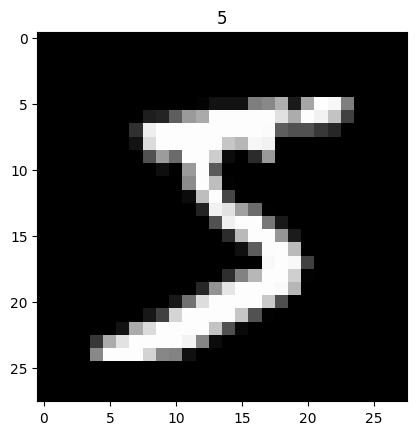

In [ ]:
plt.imshow(image.squeeze() , cmap="gray")
plt.title(label);

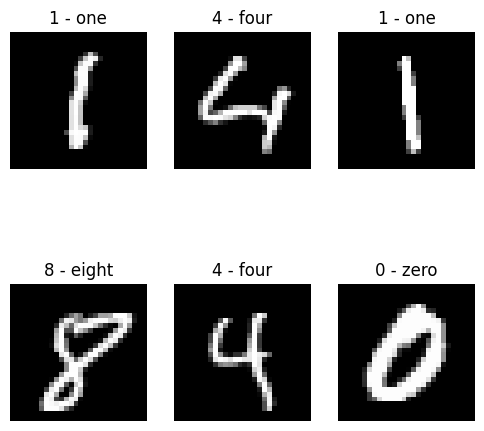

In [ ]:
# plot random images
fig = plt.figure(figsize=(6,6))
rows , cols = 2 , 3
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0 , len(train_data),size=[1]).item()
  img , lbl = train_data[random_idx]
  fig.add_subplot(rows , cols , i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[lbl])
  plt.axis(False)


## 6. Turn the MNIST train and test datasets into dataloaders using torch.utils.data.DataLoader, set the batch_size=32.

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True
                              )

test_dataloader = DataLoader(dataset = test_data ,
                             batch_size = BATCH_SIZE ,
                             shuffle = True)

In [ ]:
len(train_dataloader) , len(test_dataloader)

(1875, 313)

In [ ]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

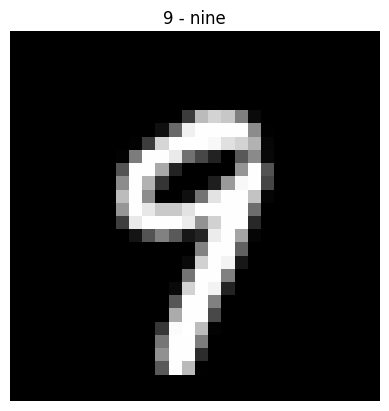

In [ ]:
rand_idx = torch.randint(0,len(train_features_batch),size=[1]).item()
img , label = train_features_batch[rand_idx] , train_labels_batch[rand_idx]
plt.imshow(img.squeeze() , cmap = "gray")
plt.title(class_names[label])
plt.axis(False);

## 7. Recreate model_2 used in this notebook (the same model from the CNN Explainer website, also known as TinyVGG) capable of fitting on the MNIST dataset.

In [ ]:
class MNISTModelV1(nn.Module):
  def __init__(self , input_shape:int , hidden_units:int , output_shape:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1
                  ),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels= hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                   out_channels = hidden_units,
                   kernel_size = 3,
                   stride = 1,
                   padding = 1
                   ),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                   out_channels = hidden_units,
                   kernel_size = 3,
                   stride = 1,
                   padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7, # Corrected in_features
                  out_features = output_shape)
    )

  def forward(self,x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    # print(f"Output shape of conv_layer_2:{x.shape}")
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_0 = MNISTModelV1(input_shape = 1,
                       hidden_units = 10,
                       output_shape = len(class_names)).to(device)


In [ ]:
random_image_tensor = torch.randn(size=(1,1,28,28)).to(device)
output = model_0(random_image_tensor)
print(f"Output shape of model_2: {output.shape}")

Output shape of model_2: torch.Size([1, 10])


In [ ]:
# bring helper functions from learn PyTorch repo
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists , skipping download...")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)


In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.1)

In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [ ]:
def train_step(model : nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device : torch.device = device):
  model.train()
  train_loss , train_acc = 0,0
  for batch , (X,y) in enumerate(dataloader):
    X,y = X.to(device) , y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred , y)
    train_loss += loss.item()
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)

  print(f"Train loss : {train_loss:.5f} | Train_acc : {train_acc:.2f} %")

In [ ]:
def test_step(model:nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn,
              device:torch.device = device):
  model.eval()
  test_loss , test_acc = 0,0
  with torch.inference_mode():
    for X,y in dataloader:
      X,y = X.to(device) , y.to(device)
      test_pred = model(X)
      loss = loss_fn(test_pred ,y)
      test_loss += loss.item()
      test_acc += accuracy_fn(y_true = y,
                              y_pred = test_pred.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test loss : {test_loss:.5f} | Test_acc : {test_acc:.2f} %")

In [ ]:
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)
# epochs = 3
# start_time_on_cpu = timer()

# # Import print_train_time
# from helper_functions import print_train_time

# for epoch in tqdm(range(epochs)):
#   print(f"Epoch: {epoch} \n------ ")
#   train_step(model=model_0,
#              dataloader=train_dataloader,
#              loss_fn=loss_fn,
#              optimizer=optimizer,
#              accuracy_fn=accuracy_fn
#              )
#   test_step(model=model_0,
#              dataloader=train_dataloader,
#              loss_fn=loss_fn,
#              accuracy_fn=accuracy_fn)

# end_time_on_cpu = timer()
# total_time_on_cpu = print_train_time(start = start_time_on_cpu,
#                                      end = end_time_on_cpu ,
#                                      device = device)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 5
start_time_on_gpu = timer()

# Import print_train_time
from helper_functions import print_train_time

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch} \n------ ")
  train_step(model=model_0,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn
             )
  test_step(model=model_0,
             dataloader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn)

end_time_on_gpu = timer()
total_time_on_gpu = print_train_time(start = start_time_on_gpu,
                                     end = end_time_on_gpu ,
                                     device = device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 
------ 
Train loss : 0.33490 | Train_acc : 88.74 %
Test loss : 0.08618 | Test_acc : 97.35 %
Epoch: 1 
------ 
Train loss : 0.08449 | Train_acc : 97.37 %
Test loss : 0.05779 | Test_acc : 98.17 %
Epoch: 2 
------ 
Train loss : 0.06705 | Train_acc : 97.92 %
Test loss : 0.07210 | Test_acc : 97.75 %
Epoch: 3 
------ 
Train loss : 0.05777 | Train_acc : 98.16 %
Test loss : 0.04510 | Test_acc : 98.57 %
Epoch: 4 
------ 
Train loss : 0.05173 | Train_acc : 98.36 %
Test loss : 0.04145 | Test_acc : 98.67 %

Train time on cuda: 101.120 seconds


151 seconds on cpu


51.5 seconds on gpu

## 8. Make predictions using your trained model and visualize at least 5 of them comparing the prediction to the target label.

In [ ]:
def make_predictions(model:nn.Module,
                     data:list,
                     device:torch.device=device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample,dim=0).to(device)
      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze() , dim = 0)
      pred_probs.append(pred_prob.cpu()) # Corrected: call .cpu() on pred_prob
  return torch.stack(pred_probs)

In [ ]:
img1 , label1 = test_data[0][:10]
img1.shape , label

(torch.Size([1, 28, 28]), tensor(9))

In [ ]:
import random
test_samples = []
test_labels = []
for sample , label in random.sample(list(test_data) , k=9):
  test_samples.append(sample)
  test_labels.append(label)

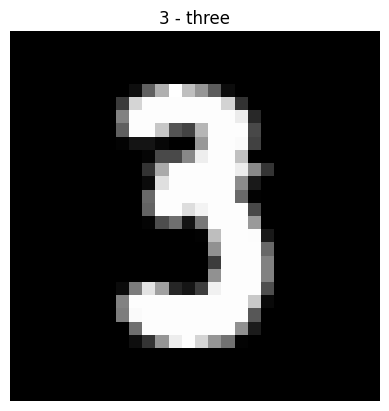

In [ ]:
plt.imshow(test_samples[0].squeeze(),cmap="gray")
plt.title(class_names[test_labels[0]]);
plt.axis(False);

In [ ]:
pred_probs = make_predictions(model = model_0,
                              data = test_samples)
pred_classes = pred_probs.argmax(dim=1)
pred_classes , test_labels

(tensor([3, 3, 4, 1, 7, 0, 6, 0, 1]), [3, 3, 4, 1, 7, 0, 6, 0, 1])

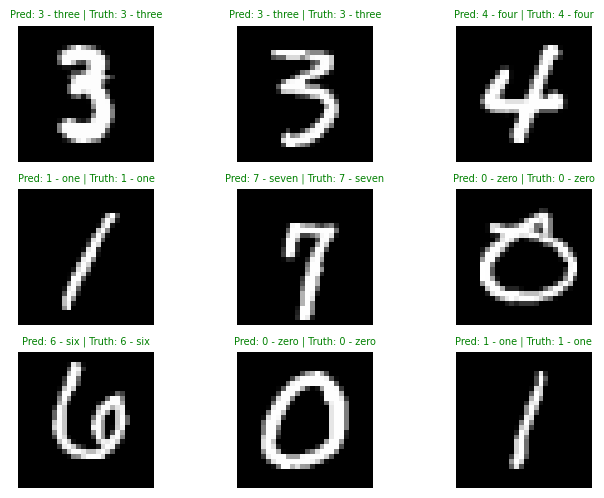

In [ ]:
# Plot predictions
plt.figure(figsize=(8,6))
nrows = 3
ncols = 3

for i , sample in enumerate(test_samples):
  # create subplot
  plt.subplot(nrows,ncols,i+1)

  # plot the target image
  plt.imshow(sample.squeeze() , cmap ="gray")

  # Find the prediction (in text form)
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  # Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth label and change color of text
  if pred_label == truth_label:
    plt.title(title_text , fontsize = 7 , c="g")
  else:
    plt.title(title_text , fontsize = 7 , c="r")

  plt.axis(False);

## 10. Plot a confusion matrix comparing your model's predictions to the truth labels

In [ ]:
y_preds = []
model_0.eval()
with torch.inference_mode():
  for X,y in tqdm(test_dataloader , desc = "Make predictions... "):
    X,y = X.to(device) , y.to(device)
    y_logit = model_0(X)
    y_pred = torch.softmax(y_logit , dim=1).argmax(dim=1)
    y_preds.append(y_pred.cpu())


# Concatenate list of predictions into a tensor
# y_preds
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor


Make predictions... :   0%|          | 0/313 [00:00<?, ?it/s]

tensor([8, 7, 7,  ..., 2, 1, 7])

In [ ]:
try:
  import torchmetrics , mlxtend
  print(f"torchmetrics version : {torchmetrics.__version__}")
  print(f"mlxtend version : {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19 , "mlxtend version should be 19 or higher"
except:
  print("installing mlxtend and torchmetrics")
  !pip install torchmetrics -q
  !pip install mlxtend -q
  import torchmetrics , mlxtend
  print(f"torchmetrics version : {torchmetrics.__version__}")
  print(f"mlxtend version : {mlxtend.__version__}")

installing mlxtend and torchmetrics
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.0/983.0 kB 15.3 MB/s eta 0:00:00
torchmetrics version : 1.8.1
mlxtend version : 0.23.4


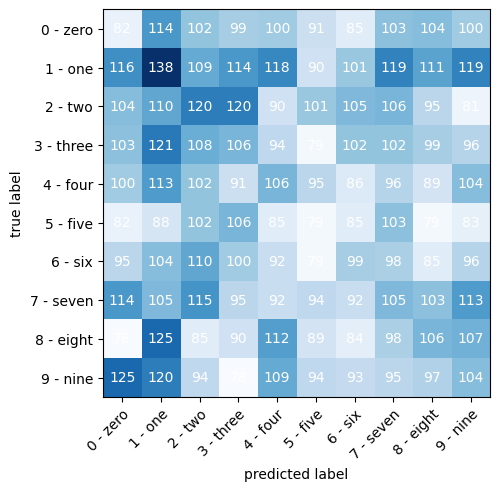

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass" , num_classes = len(class_names))
confmat_tensor = confmat(preds = y_pred_tensor , target = test_data.targets) # Changed target to test_data.targets

fig , ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                 class_names=class_names,
                                 figsize=(5,7))

plt.show()

In [ ]:
len(y_pred_tensor) == len(test_data.targets)

True